In [29]:
#Import pandas,json and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
sns.set(style="whitegrid", color_codes=True)

In [30]:
# read the credit_card_default file and get the data in a pandas dataframe
df = pd.read_csv("credit_card_default.csv")
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [32]:
df['DUE_1']=df['BILL_AMT1']-df['PAY_AMT1']
df['DUE_2']=df['BILL_AMT2']-df['PAY_AMT2']
df['DUE_3']=df['BILL_AMT3']-df['PAY_AMT3']
df['DUE_4']=df['BILL_AMT4']-df['PAY_AMT4']
df['DUE_5']=df['BILL_AMT5']-df['PAY_AMT5']
df['DUE_6']=df['BILL_AMT6']-df['PAY_AMT6']

In [33]:
data=df[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','DUE_1']]
label=df['default payment next month']


In [34]:
data_np=np.array(data)
#data.DUE_1=np.log(data.DUE_1)
#data.LIMIT_BAL=np.log(data.LIMIT_BAL)


In [35]:
#data.DUE_1=np.nan_to_num(data.DUE_1)


In [36]:
data=data.drop(['ID'],axis=1)


In [37]:
#Train-Test split
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.3, random_state = 42)


In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)
# Print the accuracy from the testing data.
print("Using accuracy score")
print(accuracy_score(logis.predict(data_test), label_test))
# Predicted data for test
label_pred = logis.predict(data_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))


Training score:  0.777333333333
Testing score:  0.782222222222
Using accuracy score
0.782222222222
[[7040    0]
 [1960    0]]
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      7040
          1       0.00      0.00      0.00      1960

avg / total       0.61      0.78      0.69      9000



/Users/dipanjanbandyopadhyay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
print("Coefficients")
print(logis.coef_)
print("Intercept")
print(logis.intercept_)

Coefficients
[[ -6.17570756e-06  -2.48807560e-04  -3.09325710e-04  -2.63706644e-04
   -4.36734324e-03   3.28368937e-04   2.63650826e-04   2.32646107e-04
    2.14305066e-04   2.02270811e-04   1.94074563e-04   3.56310401e-07]]
Intercept
[-0.00014417]


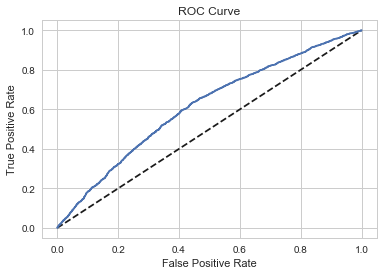

In [40]:
# Compute predicted probabilities: label_pred_prob
label_pred_prob = logis.predict_proba(data_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(label_test, label_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [41]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        print(train.shape)
        print(test.shape)
        
        clf.fit(x.iloc[train], y.iloc[train]) # fit
        result += score_func(clf.predict(x.iloc[test]), y.iloc[test]) # evaluate score function on held-out data
    return result / nfold # average

In [42]:
data_train.head(10).index
logis = LogisticRegression()
score = cv_score(logis, data_train, label_train)
print(score)
data_train.shape


(16800,)
(4200,)
(16800,)
(4200,)
(16800,)
(4200,)
(16800,)
(4200,)
(16800,)
(4200,)
0.777333333333


(21000, 12)

In [43]:
data.DUE_1=df['DUE_1']
data.LIMIT_BAL=df['LIMIT_BAL']
data.DUE_1=np.log(data.DUE_1)
data.LIMIT_BAL=np.log(data.LIMIT_BAL)
data.DUE_1=np.nan_to_num(data.DUE_1)


/Users/dipanjanbandyopadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dipanjanbandyopadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
data_train.head(3)
data.DUE_1=np.nan_to_num(data.DUE_1)


In [45]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data_train, label_train)
knn_score_train = knn.score(data_train, label_train)
print("Training score: ",knn_score_train)
knn_score_test = knn.score(data_test, label_test)
print("Testing score: ",knn_score_test)


Training score:  0.805904761905
Testing score:  0.739888888889


In [46]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 28465 to 23654
Data columns (total 12 columns):
LIMIT_BAL    21000 non-null int64
SEX          21000 non-null int64
EDUCATION    21000 non-null int64
MARRIAGE     21000 non-null int64
AGE          21000 non-null int64
PAY_0        21000 non-null int64
PAY_2        21000 non-null int64
PAY_3        21000 non-null int64
PAY_4        21000 non-null int64
PAY_5        21000 non-null int64
PAY_6        21000 non-null int64
DUE_1        21000 non-null int64
dtypes: int64(12)
memory usage: 2.1 MB


In [47]:
#decision tree
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(data_train, label_train)
rm_score_train = rm.score(data_train, label_train)
print("Training score: ",rm_score_train)
rm_score_test = rm.score(data_test, label_test)
print("Testing score: ",rm_score_test)


Training score:  0.976428571429
Testing score:  0.797222222222
